## word cloud Analysis to improve bussiness

# Contents
In this excercise , The importance of word cloud for bussiness is explained by taking a sample dataset.
This notebook is divided into three sections 
1. The first section is introduction into word cloud and how to create one using the inbuilt python function.
2. The second section we take a dataset and perform an effective data analysis and exploratory analysis on the dataset taken.
3. We use the word cloud to explore the dataset.

# 1. INTRODUCTION

## 1.1 what is a word cloud


A word cloud otherwise known as tag words is the one in which words are arranged based on thier frequencies. The more frequent and more important the word the word appears in bold and higher size. If the words are less important then the word appears less size like that.
Recently, more and more businesses have discovered the versatility of word clouds as marketing tools. These visual elements are no longer confined to web pages alone. some of the uses are How it is impactful for the bussiness is it makes the data visualization more clear and to understand the data better.In case of the marketing industry like amazon collects lots of data about their products. This can make a impact in thier bussiness like they can analyse the customers feedback to understand which they are having pain ,which they like most  Pain points (such as  “price,” or “convenience”) are very easy to identify with text clouds.Lets take a look at this how it is done.
Not only that it can be used in digital marketing to show details about the product in their web page. It is a smart way to illustrate the content.

## 1.2 how to create a word cloud in python

In [114]:
#Loading the required libraries
# In case one do not have preinstalled word cloud download it using "!pip install Wordcloud"
import warnings
warnings.filterwarnings('ignore')

#loading all necessary libraries
import numpy as np
import pandas as pd
from PIL import Image
import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re
%matplotlib inline
import seaborn as sns


In [5]:
#so our first target is to learn how to visualize the word cloud .so for that we need to check what is the command used and syntax
#so lets check out that 
WordCloud?
#so the text is the main thing the word cloud needs so lets play around with that .

In [13]:
# we will create a sample text 
text='''Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.'''

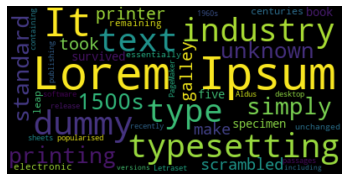

In [14]:
#without preprocessing lets check the output
wordcloud=WordCloud().generate(text)
#Its not done we need to visualize the generated wordcloud.
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

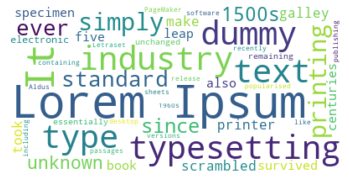

In [17]:
#so we learnt how to generate a word cloud .but those who wondering what interpolation argument has to do here
#It is just used to add clarity to the words by making it brighter to look more good for the eyes.Nothing to intrepret more 
#But still if one wishes ,change different interpolations and check it. some are 'gausian','sinc','hamming'etc.
# Ok!! now we will try with some of the arguments in the wordcloud.
stop_words=stopwords.words("english")
wordcloud=WordCloud(stopwords=stop_words,background_color='white').generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()


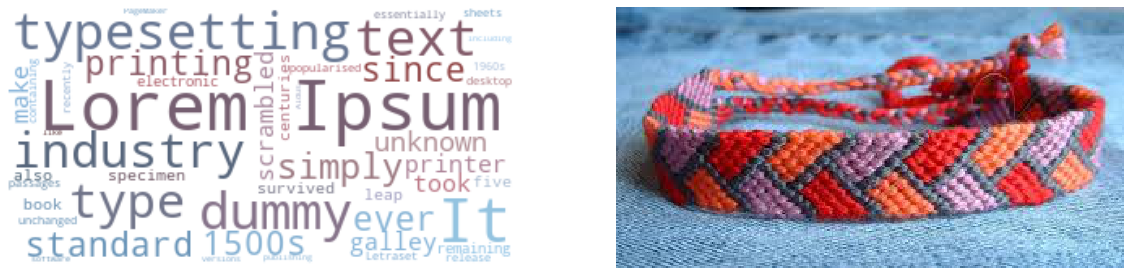

In [37]:
#so lets some interesting one .add a word cloud to image.
mask=np.array(Image.open('C:/Users/HP-PC/Pictures/Saved Pictures/download.jpg'))
wordcloud=WordCloud(stopwords=stop_words,background_color='white',mask=mask).generate(text)
#
image_colors = ImageColorGenerator(mask)
fig=plt.figure(figsize=(20,10))
a=fig.add_subplot(1,2,1)
plt.imshow(wordcloud.recolor(color_func=image_colors),interpolation='bilinear')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(mask.reshape(161,313,3))
plt.axis('off')
plt.show()


The data above generated uses color from the image on the right. ok ! now we learnt how to generate the word cloud so lets try to use it in real data and understand better. 

# 2.Data Preparation and initial Analysis

## 2.1 About the dataset 
the dataset is the amazon open source text mining dataset. Which has over +130 million customer reviews. The dataset we have taken is about books particularlly us based marketplace.since it is not possible to analse the entire dataset first 1000 rows alone is taken.
1) Before we do any analysis, we have to understand 1) what information the data has 2) what relationship exists overall 3) what can be done with different features. We have the following information for this dataset. 
The dataset can be downloaded from this link:"https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Books_v1_02.tsv.gz"

## 2.2 Attributes description

1. Marketplace -It is where the product is sold .The entry into this column is "US" only as the dataset we have taken is the books which is sold in the us. 
2. customer_id - It is the unique_id given to each customer. It is in 8 to 9 characters long.
3. review_id - The customer when makes a review for a given product aka "book" it is given a unique id.
4. product_id -Each book is given an id.
5. product_parent -If some book is a part of a series of book the previous book id is given in this attribute.
6. product_title- The book titles .
7. product_category - It is only books.
7. Star rating -The rating given to each book (1 to 5)
8. helpful_votes - They have categorized the helpful votes and total votes on which basis is unknown.
9. total_votes -The total votes received for the product.
10. vine- It is to categorize whether the review was part of the vine program which the amazon conducted to take specific group of people to provide reviews for the product or it was from the general review.
11. review_headline -The title of the review.
12. review body-The review text.
13. review_date- the date in which the review was written


In [38]:
#Load the dataset
data=pd.read_csv('C:/Users/HP-PC/Desktop/amazon_reviews_us_Books_v1_02.tsv',sep='\t',nrows=100000)


In [121]:
data.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date'],
      dtype='object')

As we know from the dataset understanding two columns :marketplace and product_category wont change so we can drop those columns. 

In [41]:
data=data.drop(['marketplace','product_category'],axis=1)

In [42]:
data.head()

,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,12076615,RQ58W7SMO911M,0385730586,122662979,Sisterhood of the Traveling Pants (Book 1),4,2,3,N,N,this book was a great learning novel!,this boook was a great one that you could lear...,2005-10-14
1,12703090,RF6IUKMGL8SF,0811828964,56191234,The Bad Girl's Guide to Getting What You Want,3,5,5,N,N,Fun Fluff,If you are looking for something to stimulate ...,2005-10-14
2,12257412,R1DOSHH6AI622S,1844161560,253182049,"Eisenhorn (A Warhammer 40,000 Omnibus)",4,1,22,N,N,this isn't a review,never read it-a young relative idicated he lik...,2005-10-14
3,50732546,RATOTLA3OF70O,0373836635,348672532,Colby Conspiracy (Colby Agency),5,2,2,N,N,fine author on her A-game,Though she is honored to be Chicago Woman of t...,2005-10-14
4,51964897,R1TNWRKIVHVYOV,0262181533,598678717,The Psychology of Proof: Deductive Reasoning i...,4,0,2,N,N,Execellent cursor examination,Review based on a cursory examination by Unive...,2005-10-14


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
customer_id          100000 non-null int64
review_id            100000 non-null object
product_id           100000 non-null object
product_parent       100000 non-null int64
product_title        100000 non-null object
star_rating          100000 non-null int64
helpful_votes        100000 non-null int64
total_votes          100000 non-null int64
vine                 100000 non-null object
verified_purchase    100000 non-null object
review_headline      99992 non-null object
review_body          100000 non-null object
review_date          99992 non-null object
dtypes: int64(5), object(8)
memory usage: 9.9+ MB


There is no null data in the dataset except review_headline.but that does not a concern now. so dont worry.but please pay a attention to the memory since it is a very huge dataset which we have taken if you have less memory and you are gonna run a big model it will take hours together to train so better pay attention to that when developing any model. one option is to take a sample of the dataset and explore it further. or perform correlation and get the data checking and missing values or perform cross validation to improve. But choices are many but must be taken.


# 2.2 exploratory data analysis


we can try the following in the dataset.
1. with star_rating category:
    i) how many books got each rating .
    ii)connection with number of votes. How many helpful votes was there to determine the rating
2. Which is the book which has highest rating.
4. is there any particular book which is liked most by the people and reviewed most.
5. In each year how many reviews are people giving .
6. is there any relation with the particular year people are buying.

## 2.2.1 Frequency distribution for the rating

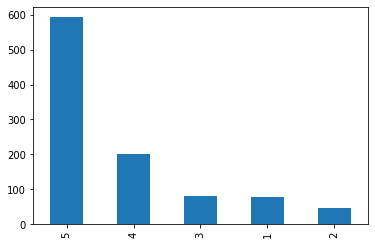

In [84]:
# the counts of star rating 
data['star_rating'].value_counts().plot(kind='bar')

## 2.2.2 Frequency distribution with helpful votes considered

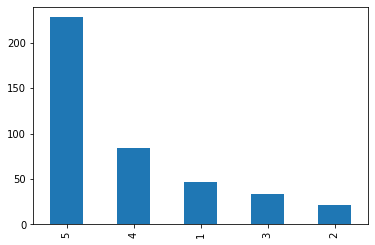

In [114]:
#connection with helpful votes 
#we will say we need at least 5 votes minimum to determine the rating as it is given.
data_new=data[data['helpful_votes']>5]
data_new['star_rating'].value_counts().plot(kind='bar')

## 2.2.3 Most Liked book

In [101]:
# The total number of books with rating -5 as per condintion is around 292.
#lets see what is the maximum vote a book got and what book it is 
data_max_star=data[data['star_rating']==5]
print("the book which got maximum rating and votes is ,",data_max_star[data_max_star['helpful_votes']==max(data_max_star['helpful_votes'])]['product_title'].values)

the book which got maximum rating and votes is , ['World Peace Diet: Eating for Spiritual Health and Social Harmony']


## 2.2.4 List of highest rated books

In [106]:
# what are some of the books which got highest rating.
list(data_max_star['product_title'].values[:10])

['Colby Conspiracy (Colby Agency)',
 'A Little History of the World (Little Histories)',
 'Faith is a Verb',
 "Furry Logic: A Guide to Life's Little Challenges",
 "Temple to the Wind: The Story of America's Greatest Naval Architect and His Masterpiece, Reliance",
 'Straight Man: A Novel',
 "Lipstick's Legacy",
 'The Last Heiress (Friarsgate Inheritance, Book 4)',
 'How to Make It Big as a Consultant',
 'Millionaire Republican: Why Rich Republicans Get Rich--and How You Can Too!']

## 2.2.5 List of Lowest rated books

In [115]:
#what are the books which got  less rating
list(data_new[data_new['star_rating']==1]['product_title'].values[:10])

['The Case for Hillary Clinton',
 'Truth vs Falsehood: How to Tell the Difference',
 'Introducing Microsoft SQL Server(tm) 2005 for Developers (PRO - Developer)',
 'Rain of Ruin: A Photographic History of Hiroshima and Nagasaki (America Goes to War)',
 'The Fourteen Bears in Summer and Winter (Deluxe Golden Book)',
 'Tuesday (Caldecott Medal Book) (Caldecott Honor Book)',
 'The Power of Positive Habits',
 'Waiting For Kate Bush',
 'Putting the Heart in Your Home: Decorating That Nurtures Your Soul',
 "Darwin's Blade: A Novel of Suspense"]

No wonder Darwin's Blade is given less rating.I will recommened for those who are feeling so bored. Anyway lets not get distracted and continue

## 2.2.6 Frequency counts for dates 

In [92]:
#only two days are considered in this sample.
#per day how many people reviewed the books with rating-5
data[data['star_rating']==5]['review_date'].value_counts()

2005-10-14    296
2005-10-13    296
Name: review_date, dtype: int64

## 2.2.7 Review Dates period

In [134]:
from datetime import datetime
#I have increased the sample size for this date visualization.
data['review_date'] = pd.to_datetime(data['review_date'])


In [135]:
data['review_date'] = pd.to_datetime(data['review_date'], format='%Y%m%d')
data['month_review'] = data.review_date.dt.to_period('M')

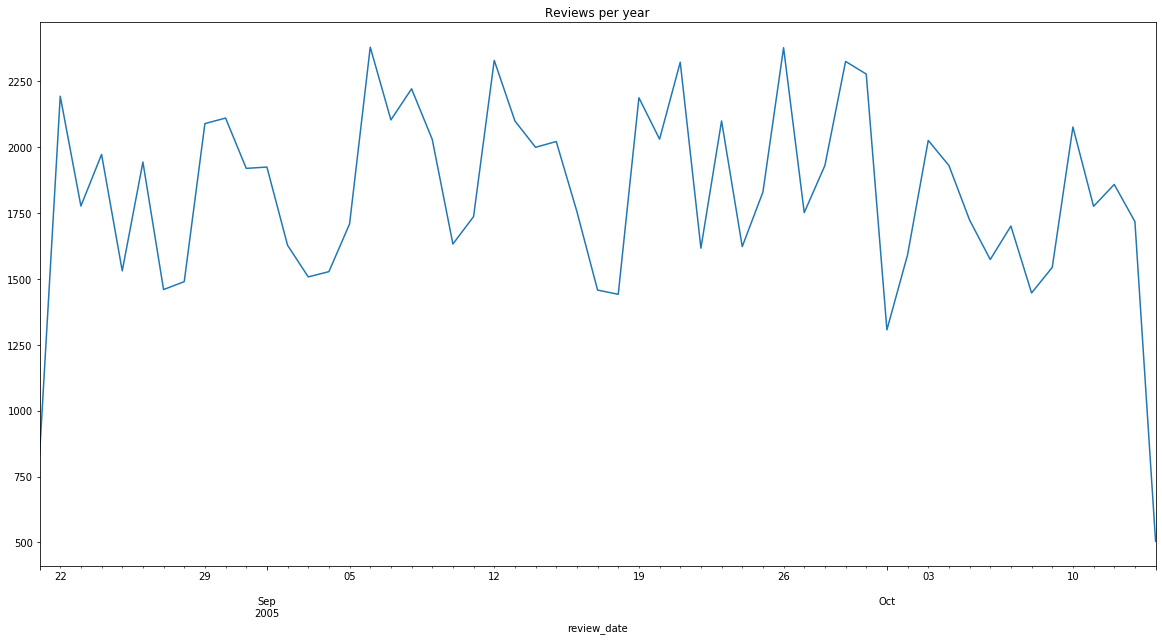

In [138]:
grp_date = data.groupby(['review_date'])['product_id'].count()
grp_month = data.groupby(['month_review'])['product_id'].count()

ts = pd.Series(grp_date)
ts.plot(kind='line', figsize=(20,10),title='Reviews per year')
plt.show()



## 2.2.8 which user contributed more to reviews

In [39]:
aggregations = {
    'review_body' : 'count',
}
user_top10 = data.groupby(['customer_id'], as_index=False).agg(aggregations).sort_values(by='review_body', ascending=False)
user_top10.head(3)

,customer_id,review_body
54383,50122160,712
8241,12598621,371
56086,50732546,355


## 2.2.9 verified purchase frequency

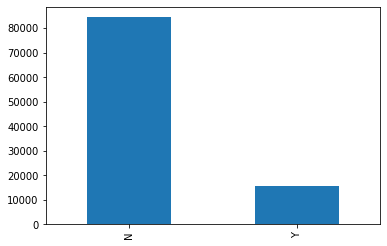

In [45]:
data['verified_purchase'].value_counts().plot(kind='bar')

## 2.2.10 The most reviewed books

In [49]:
aggregations = {
    'review_body' : 'count',
}
data_group=data.groupby(['product_title'],as_index=False).agg(aggregations).sort_values(by='review_body', ascending=False)
data_group.head(3)

,product_title,review_body
31986,"Natural Cures ""They"" Don't Want You to Know about",630
47926,The FairTax Book,531
20343,Harry Potter and the Half-Blood Prince (Book 6),377


ok! I understand. too much exploration of the data .so now we move to the word cloud generator for this dataset. Understanding and exploring the dataset is never a bad option so dont give up soon.so, Next section is word cloud generation

# 3. word cloud generator 

## 3.1 for generally all the reviews

There is 12 columns present but since we want to understand user or customers reaction or review using word cloud we will take only review_body from the dataset and analyze it further.

In [52]:
data_x=data[['review_body']]

#so lets do some usuall preprocessing to these sentences
so basically we are going to 
1.remove the punctuation marks present in the sentences.
2.convert all the words to lower case
2.tokenize the words in the sentence
3.remove stopwords from the sentences.

In [53]:
pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
def remove_html(text):
    no_html= pattern.sub('',text)
    return no_html

In [54]:
data_x['review_body']=data['review_body'].apply(lambda x : remove_html(x))

In [55]:
#convert to lowercase
data_x['review_body']=data_x['review_body'].str.lower()
data_x['review_body']=data_x['review_body'].str.split(" ")

This is obviously the book product review dataset so its the people will use book,author and story often but that does not shows us whether majority of customer liked the product or not so we will remove the most common words wh

In [56]:
punctuation=list(string.punctuation)
stop_words=stopwords.words('english')
stop_words.extend(['book','author','story','br'])
all_cleaned_data=[]
for text in data_x['review_body']:
    words=[x.strip(string.punctuation) for x in text if x not in stop_words]
    all_cleaned_data.append(words)

    

In [57]:
text = [" ".join(text) for text in all_cleaned_data]
final_text = " ".join(text)
    

In [58]:
final_text[:500]

'boook great one could learn from teaches imponrtance family values also deals basic issues teens kids even deal with  4 best friends first time lives spending summer apart one day one girls rooms finds pair pants tucked away closet  four  try realize really something special pants  seeming 4 girls differnt shapes sizes somehow pants fit them  realize pants start something special  immediatley following decided make certian rules abut pants must write best thing u wearing pants summer right leg a'

In [59]:
wordcloud_spam = WordCloud(stopwords=stop_words,background_color="white").generate(final_text)


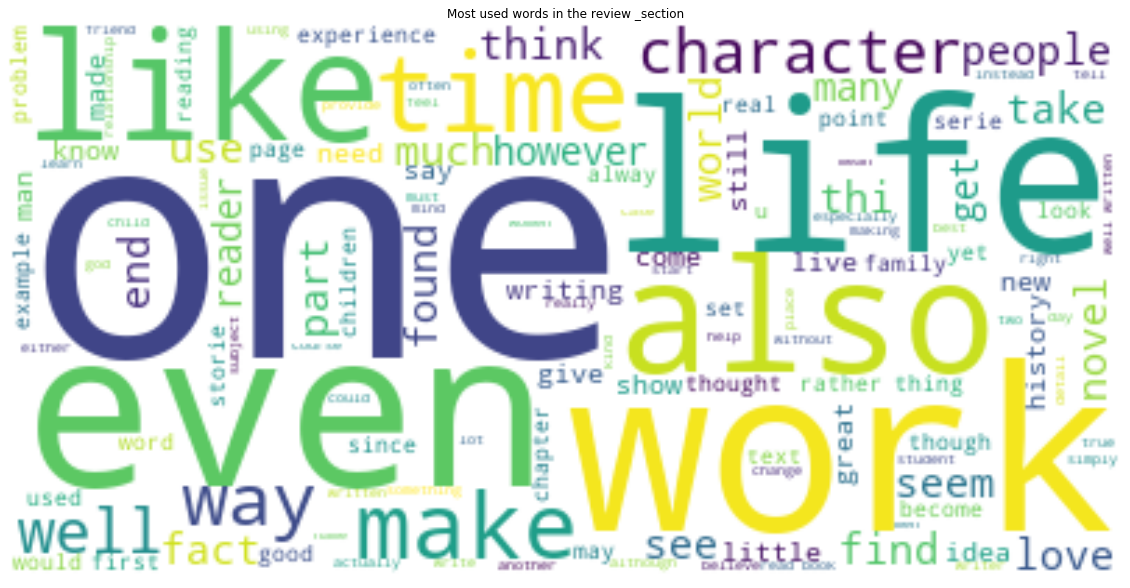

In [60]:
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title("Most used words in the review _section")
plt.axis("off")
plt.show()

## 3.2 word cloud for top rated booksreviewed 

In [95]:
data_x=data[data['star_rating']==5]

In [96]:
data_x1['review_body']=data_x['review_body']


In [97]:
pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
def remove_html(text):
    no_html= pattern.sub('',text)
    return no_html

In [98]:
data_x1['review_body']=data_x1['review_body'].apply(lambda x : remove_html(x))

In [99]:
#convert to lowercase
data_x1['review_body']=data_x1['review_body'].str.lower()
data_x1['review_body']=data_x1['review_body'].str.split(" ")

In [101]:
punctuation=list(string.punctuation)
stop_words=stopwords.words('english')
stop_words.extend(['book','author','story','br'])
all_cleaned_data=[]
for text in data_x1['review_body']:
    words=[x.strip(string.punctuation) for x in text if x not in stop_words]
    all_cleaned_data.append(words)


In [102]:
text = [" ".join(text) for text in all_cleaned_data]
final_text = " ".join(text)

In [103]:
final_text[:500]

'though honored chicago woman year victoria colby-camp euphoric mental improvement son jim shown recently especially since tasha north fell love  jim snatched almost twenty years ago seven turned killing seth whose goal murder victoria abandoning him  however elation would turn despair knew seth resurfaced started rape pregnant tasha.<br br former military strategist daniel marks town complements colby agency wants hire him  also chicago emily hastings whose father veteran homicide detective murd'

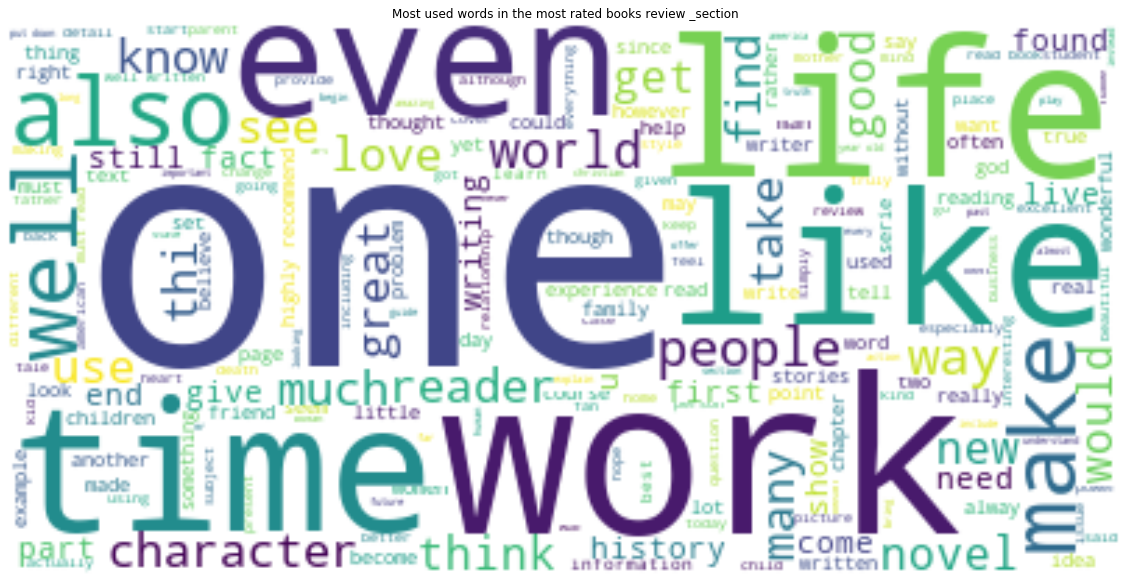

In [104]:
wordcloud_spam = WordCloud(stopwords=stop_words,background_color="white").generate(final_text)
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title("Most used words in the most rated books review _section")
plt.axis("off")
plt.show()

In [108]:
from textblob import TextBlob
def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity

In [109]:
data_x['text_sentiment'] = data_x['review_body'].apply(sentiment)

In [112]:
data_x['sentiment'] = ''
data_x['sentiment'][data_x['text_sentiment'] > 0] = 'positive'
data_x['sentiment'][data_x['text_sentiment'] < 0] = 'negative'
data_x['sentiment'][data_x['text_sentiment'] == 0] = 'neutral'

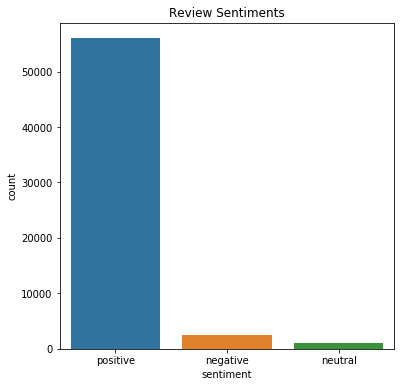

In [115]:
plt.figure(figsize=(6,6))
ax = sns.countplot(data_x['sentiment'])
plt.title('Review Sentiments');

More number of reviews were positive in the website.for books .there more book lovers!!!

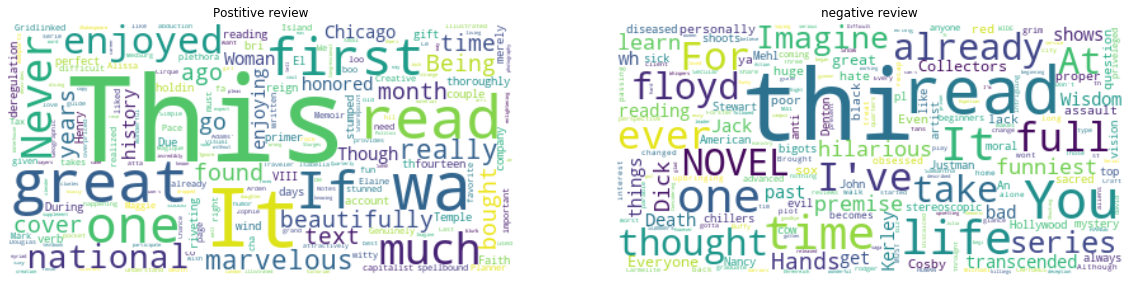

In [128]:
positive_text=data_x[data_x['sentiment']=='positive']
negative_text=data_x[data_x['sentiment']=='negative']
neutral_text=data_x[data_x['sentiment']=='neutral']
wordcloud=WordCloud(stopwords=stop_words,background_color='white').generate(str(positive_text['review_body']))
wordcloud1=WordCloud(stopwords=stop_words,background_color='white').generate(str(negative_text['review_body']))
wordcloud2=WordCloud(stopwords=stop_words,background_color='white').generate(str(neutral_text['review_body']))
fig=plt.figure(figsize=(20,10))
a=fig.add_subplot(1,2,1)
plt.imshow(wordcloud,interpolation='bilinear')
plt.title("Postitive review")
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(wordcloud1,interpolation='bilinear')
plt.title("negative review")
plt.axis('off')
plt.show()


so, This word cloud shows positive reviews from this one can understand that the positive review has words like "great". To determine that the words represent positive review. but still in some cases .like this book is not great can also be taken by the normal sentiment analyser as positive so it needs further exploration. to correctly perform the classification. But that is not our area right now .so we dont need to go into it deeper. but as of now lets be clear with word clouds are used to interpret the text dataset to improve the bussiness expecially in marketing.

# summary

So, we know about word cloud and some of the techniques used to word cloud using dataset.